In [1]:
# pip install missingno

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import statistics as stat

# from fancyimpute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

import xgboost as xgb
from xgboost import XGBClassifier

from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

In [2]:
pd.options.display.max_rows = 4000

### Importing the data

In [3]:
data = pd.read_csv('Test1.csv', encoding='ISO-8859-1')

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Data Overview

In [4]:
pd.set_option("display.max_columns", 150)
data.head()

,ID,HOSPNUM,RDELAY,RCONSC,SEX,AGE,RSLEEP,RATRIAL,RCT,RVISINF,RHEP24,RASP3,RSBP,RDEF1,RDEF2,RDEF3,RDEF4,RDEF5,RDEF6,RDEF7,RDEF8,STYPE,RDATE,HOURLOCAL,MINLOCAL,DAYLOCAL,RXASP,RXHEP,DASP14,DASPLT,DLH14,DMH14,DHH14,ONDRUG,DSCH,DIVH,DAP,DOAC,DGORM,DSTER,DCAA,DHAEMD,DCAREND,DTHROMB,DMAJNCH,DMAJNCHD,DMAJNCHX,DSIDE,DSIDED,DSIDEX,DDIAGISC,DDIAGHA,DDIAGUN,DNOSTRK,DNOSTRKX,DRSISC,DRSISCD,DRSH,DRSHD,DRSUNK,DRSUNKD,DPE,DPED,DALIVE,DALIVED,DPLACE,FLASTD,FRECOVER,FDENNIS,FPLACE,FAP,FOAC,FU1_RECD,FU2_DONE,COUNTRY,CNTRYNUM,FU1_COMP,NCCODE,CMPLASP,CMPLHEP,TD,EXPDD,EXPD6,EXPD14,SET14D,ID14,DEAD1,DEAD2,DEAD3,DEAD4,DEAD5,DEAD6,DEAD7,DEAD8,H14,ISC14,NK14,STRK14,HTI14,PE14,DVT14,TRAN14,NCB14
0,9826,1,43,F,F,71,N,NaN,Y,N,NaN,NaN,170,Y,Y,Y,N,N,N,N,N,LACS,sty-91,99,99,3,Y,N,Y,Y,N,NaN,N,11.0,NaN,NaN,N,N,N,N,N,N,NaN,NaN,N,NaN,NaN,N,NaN,NaN,Y,N,N,N,NaN,N,NaN,N,NaN,NaN,NaN,N,NaN,Y,11.0,NaN,NaN,N,Y,A,NaN,NaN,11.0,189.0,UK,27,NaN,NaN,Y,Y,189.0,0.5275,0.1009,0.0323,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9827,1,6,F,M,81,N,NaN,N,N,NaN,NaN,170,N,N,N,Y,N,N,N,N,PACS,sty-91,99,99,7,N,H,N,Y,N,NaN,Y,14.0,NaN,NaN,N,N,N,N,Y,N,NaN,NaN,N,NaN,NaN,N,NaN,NaN,Y,N,N,N,NaN,N,NaN,N,NaN,NaN,NaN,N,NaN,Y,16.0,NaN,NaN,Y,N,A,NaN,NaN,23.0,183.0,UK,27,NaN,NaN,Y,Y,183.0,0.4021,0.1147,0.0244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9828,4,20,F,M,78,N,NaN,N,N,NaN,NaN,170,Y,Y,Y,N,N,N,N,N,LACS,lut-91,99,99,6,Y,H,Y,Y,N,NaN,Y,14.0,NaN,NaN,N,N,N,N,N,N,NaN,NaN,N,NaN,NaN,N,NaN,NaN,Y,N,N,N,NaN,N,NaN,N,NaN,NaN,NaN,N,NaN,N,NaN,NaN,NaN,N,Y,E,NaN,NaN,17.0,214.0,UK,27,NaN,NaN,Y,Y,214.0,0.5600,0.1709,0.0441,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9829,1,39,F,M,54,N,NaN,Y,N,NaN,NaN,135,Y,Y,Y,N,N,N,N,N,LACS,lut-91,99,99,2,N,N,N,Y,N,NaN,N,7.0,NaN,NaN,N,N,N,N,N,N,NaN,NaN,N,NaN,NaN,N,NaN,NaN,Y,N,N,N,NaN,N,NaN,N,NaN,NaN,NaN,N,NaN,Y,7.0,NaN,NaN,N,N,A,NaN,NaN,16.0,185.0,UK,27,NaN,NaN,Y,Y,185.0,0.3132,0.0471,0.0244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9830,1,4,F,F,77,N,NaN,N,N,NaN,NaN,140,Y,Y,Y,N,N,N,Y,N,POCS,lut-91,99,99,1,Y,N,Y,Y,N,NaN,N,14.0,NaN,NaN,N,N,N,N,N,N,NaN,NaN,N,NaN,NaN,Y,14.0,NOSE BLEED 15 MINS,N,N,N,Y,NaN,N,NaN,N,NaN,NaN,NaN,N,NaN,N,NaN,NaN,NaN,N,N,A,NaN,NaN,15.0,194.0,UK,27,15.0,NaN,Y,Y,194.0,0.7285,0.1873,0.0530,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [5]:
data.set_index('ID')

,HOSPNUM,RDELAY,RCONSC,SEX,AGE,RSLEEP,RATRIAL,RCT,RVISINF,RHEP24,RASP3,RSBP,RDEF1,RDEF2,RDEF3,RDEF4,RDEF5,RDEF6,RDEF7,RDEF8,STYPE,RDATE,HOURLOCAL,MINLOCAL,DAYLOCAL,RXASP,RXHEP,DASP14,DASPLT,DLH14,DMH14,DHH14,ONDRUG,DSCH,DIVH,DAP,DOAC,DGORM,DSTER,DCAA,DHAEMD,DCAREND,DTHROMB,DMAJNCH,DMAJNCHD,DMAJNCHX,DSIDE,DSIDED,DSIDEX,DDIAGISC,DDIAGHA,DDIAGUN,DNOSTRK,DNOSTRKX,DRSISC,DRSISCD,DRSH,DRSHD,DRSUNK,DRSUNKD,DPE,DPED,DALIVE,DALIVED,DPLACE,FLASTD,FRECOVER,FDENNIS,FPLACE,FAP,FOAC,FU1_RECD,FU2_DONE,COUNTRY,CNTRYNUM,FU1_COMP,NCCODE,CMPLASP,CMPLHEP,TD,EXPDD,EXPD6,EXPD14,SET14D,ID14,DEAD1,DEAD2,DEAD3,DEAD4,DEAD5,DEAD6,DEAD7,DEAD8,H14,ISC14,NK14,STRK14,HTI14,PE14,DVT14,TRAN14,NCB14
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9826,1,43,F,F,71,N,NaN,Y,N,NaN,NaN,170,Y,Y,Y,N,N,N,N,N,LACS,sty-91,99,99,3,Y,N,Y,Y,N,NaN,N,11.0,NaN,NaN,N,N,N,N,N,N,NaN,NaN,N,NaN,NaN,N,NaN,NaN,Y,N,N,N,NaN,N,NaN,N,NaN,NaN,NaN,N,NaN,Y,11.0,NaN,NaN,N,Y,A,NaN,NaN,11.0,189.0,UK,27,NaN,NaN,Y,Y,189.0,0.5275,0.1009,0.0323,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9827,1,6,F,M,81,N,NaN,N,N,NaN,NaN,170,N,N,N,Y,N,N,N,N,PACS,sty-91,99,99,7,N,H,N,Y,N,NaN,Y,14.0,NaN,NaN,N,N,N,N,Y,N,NaN,NaN,N,NaN,NaN,N,NaN,NaN,Y,N,N,N,NaN,N,NaN,N,NaN,NaN,NaN,N,NaN,Y,16.0,NaN,NaN,Y,N,A,NaN,NaN,23.0,183.0,UK,27,NaN,NaN,Y,Y,183.0,0.4021,0.1147,0.0244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9828,4,20,F,M,78,N,NaN,N,N,NaN,NaN,170,Y,Y,Y,N,N,N,N,N,LACS,lut-91,99,99,6,Y,H,Y,Y,N,NaN,Y,14.0,NaN,NaN,N,N,N,N,N,N,NaN,NaN,N,NaN,NaN,N,NaN,NaN,Y,N,N,N,NaN,N,NaN,N,NaN,NaN,NaN,N,NaN,N,NaN,NaN,NaN,N,Y,E,NaN,NaN,17.0,214.0,UK,27,NaN,NaN,Y,Y,214.0,0.5600,0.1709,0.0441,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9829,1,39,F,M,54,N,NaN,Y,N,NaN,NaN,135,Y,Y,Y,N,N,N,N,N,LACS,lut-91,99,99,2,N,N,N,Y,N,NaN,N,7.0,NaN,NaN,N,N,N,N,N,N,NaN,NaN,N,NaN,NaN,N,NaN,NaN,Y,N,N,N,NaN,N,NaN,N,NaN,NaN,NaN,N,NaN,Y,7.0,NaN,NaN,N,N,A,NaN,NaN,16.0,185.0,UK,27,NaN,NaN,Y,Y,185.0,0.3132,0.0471,0.0244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9830,1,4,F,F,77,N,NaN,N,N,NaN,NaN,140,Y,Y,Y,N,N,N,Y,N,POCS,lut-91,99,99,1,Y,N,Y,Y,N,NaN,N,14.0,NaN,NaN,N,N,N,N,N,N,NaN,NaN,N,NaN,NaN,Y,14.0,NOSE BLEED 15 MINS,N,N,N,Y,NaN,N,NaN,N,NaN,NaN,NaN,N,NaN,N,NaN,NaN,NaN,N,N,A,NaN,NaN,15.0,194.0,UK,27,15.0,NaN,Y,Y,194.0,0.7285,0.1873,0.0530,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19379,367,7,F,M,66,N,N,Y,Y,N,N,110,Y,Y,Y,N,N,C,C,C,PACS,lip-94,21,5,4,Y,L,Y,Y,Y,N,NaN,6.0,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,N,NaN,NaN,Y,N,N,N,NaN,N,NaN,N,NaN,N,NaN,N,NaN,Y,6.0,A,NaN,Y,N,A,Y,N,61.0,184.0,UK,27,13.0,NaN,Y,Y,184.0,0.7435,0.1963,0.0821,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19380,255,33,F,M,68,N,Y,Y,N,N,N,160,N,Y,Y,N,N,N,N,N,LACS,sie-94,15,31,4,Y,L,Y,N,Y,N,NaN,6.0,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,N,NaN,NaN,Y,N,N,N,NaN,N,NaN,N,NaN,N,NaN,N,NaN,Y,6.0,E,NaN,N,Y,A,N,Y,41.0,177.0,UK,27,26.0,NaN,Y,Y,177.0,0.3522,0.1078,0.0337,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19381,341,21,F,M,77,N,N,Y,N,N,N,220,Y,Y,Y,N,N,N,N,N,LACS,lip-94,9,47,4,N,N,N,N,N,N,NaN,5.0,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,N,NaN,NaN,Y,N,N,N,NaN,Y,1.0,N,NaN,N,NaN,N,NaN,Y,5.0,E,NaN,N,Y,D,N,Y,99.0,174.0,NETH,15,96.0,NaN,Y,Y,174.0,0.5688,0.1503,0.0402,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [6]:
data.isnull().sum()

ID              0
HOSPNUM         0
RDELAY          0
RCONSC          0
SEX             0
AGE             0
RSLEEP          0
RATRIAL       497
RCT             0
RVISINF         0
RHEP24        167
RASP3         497
RSBP            0
RDEF1           0
RDEF2           0
RDEF3           0
RDEF4           0
RDEF5           0
RDEF6           0
RDEF7           0
RDEF8           0
STYPE           0
RDATE           0
HOURLOCAL       0
MINLOCAL        0
DAYLOCAL        0
RXASP           0
RXHEP           0
DASP14         10
DASPLT         64
DLH14           8
DMH14         505
DHH14        9061
ONDRUG          1
DSCH          150
DIVH          151
DAP             7
DOAC            7
DGORM           8
DSTER          12
DCAA           12
DHAEMD         12
DCAREND       504
DTHROMB       155
DMAJNCH         6
DMAJNCHD     9485
DMAJNCHX     9486
DSIDE           6
DSIDED       9250
DSIDEX       9249
DDIAGISC       11
DDIAGHA        13
DDIAGUN        12
DNOSTRK        13
DNOSTRKX     9336
DRSISC    

In [7]:
# List the numeric columns
num = [col for col in data.columns if data[col].dtype != 'object']
print(num)

['ID', 'HOSPNUM', 'RDELAY', 'AGE', 'RSBP', 'HOURLOCAL', 'MINLOCAL', 'DAYLOCAL', 'ONDRUG', 'DMAJNCHD', 'DSIDED', 'DRSISCD', 'DRSHD', 'DRSUNKD', 'DPED', 'DALIVED', 'FLASTD', 'FU1_RECD', 'FU2_DONE', 'CNTRYNUM', 'FU1_COMP', 'TD', 'EXPDD', 'EXPD6', 'EXPD14', 'SET14D', 'ID14', 'DEAD1', 'DEAD2', 'DEAD3', 'DEAD4', 'DEAD5', 'DEAD6', 'DEAD7', 'DEAD8', 'H14', 'ISC14', 'NK14', 'STRK14', 'HTI14', 'PE14', 'DVT14', 'TRAN14', 'NCB14']


In [8]:
# List the categorical columns
obj = [col for col in data.columns if data[col].dtype == 'object']
print(obj)

['RCONSC', 'SEX', 'RSLEEP', 'RATRIAL', 'RCT', 'RVISINF', 'RHEP24', 'RASP3', 'RDEF1', 'RDEF2', 'RDEF3', 'RDEF4', 'RDEF5', 'RDEF6', 'RDEF7', 'RDEF8', 'STYPE', 'RDATE', 'RXASP', 'RXHEP', 'DASP14', 'DASPLT', 'DLH14', 'DMH14', 'DHH14', 'DSCH', 'DIVH', 'DAP', 'DOAC', 'DGORM', 'DSTER', 'DCAA', 'DHAEMD', 'DCAREND', 'DTHROMB', 'DMAJNCH', 'DMAJNCHX', 'DSIDE', 'DSIDEX', 'DDIAGISC', 'DDIAGHA', 'DDIAGUN', 'DNOSTRK', 'DNOSTRKX', 'DRSISC', 'DRSH', 'DRSUNK', 'DPE', 'DALIVE', 'DPLACE', 'FRECOVER', 'FDENNIS', 'FPLACE', 'FAP', 'FOAC', 'COUNTRY', 'NCCODE', 'CMPLASP', 'CMPLHEP']


In [9]:
# List the unique values in each numeric column 
pd.Series({col: data[col].unique() for col in data[num].columns})

ID           [9826, 9827, 9828, 9829, 9830, 9831, 9832, 983...
HOSPNUM      [1, 4, 6, 3, 8, 10, 5, 2, 15, 16, 14, 11, 17, ...
RDELAY       [43, 6, 20, 39, 4, 18, 13, 14, 16, 10, 29, 22,...
AGE          [71, 81, 78, 54, 77, 47, 48, 45, 68, 63, 56, 8...
RSBP         [170, 135, 140, 150, 174, 160, 180, 118, 120, ...
HOURLOCAL    [99, 17, 15, 14, 16, 9, 10, 6, 20, 12, 11, 13,...
MINLOCAL     [99, 4, 18, 42, 25, 54, 55, 19, 32, 34, 45, 9,...
DAYLOCAL                                 [3, 7, 6, 2, 1, 5, 4]
ONDRUG       [11.0, 14.0, 7.0, 5.0, 1.0, 9.0, 4.0, 8.0, 10....
DMAJNCHD     [nan, 7.0, 14.0, 2.0, 11.0, 4.0, 9.0, 8.0, 6.0...
DSIDED       [nan, 14.0, 1.0, 9.0, 2.0, 3.0, 6.0, 8.0, 11.0...
DRSISCD      [nan, 2.0, 1.0, 0.0, 4.0, 12.0, 3.0, 16.0, 5.0...
DRSHD        [nan, 3.0, 2.0, 4.0, 1.0, 13.0, 8.0, 5.0, 9.0,...
DRSUNKD      [nan, 5.0, 4.0, 3.0, 8.0, 10.0, 2.0, 46.0, 1.0...
DPED         [nan, 30.0, 3.0, 16.0, 13.0, 7.0, 2.0, 9.0, 5....
DALIVED      [11.0, 16.0, nan, 7.0, 5.0, 14.0, 1.0, 9.0

In [10]:
# these fields should be categorical 
for col in ['SET14D','ID14','DEAD1','DEAD2','DEAD3','DEAD4','DEAD5','DEAD6','DEAD7','DEAD8',
'H14','ISC14','NK14','STRK14','HTI14','PE14','DVT14','TRAN14','NCB14']: 
    data[col] = data[col].astype('object')

In [11]:
# List the numeric columns
num = [col for col in data.columns if data[col].dtype != 'object']
print(num)

['ID', 'HOSPNUM', 'RDELAY', 'AGE', 'RSBP', 'HOURLOCAL', 'MINLOCAL', 'DAYLOCAL', 'ONDRUG', 'DMAJNCHD', 'DSIDED', 'DRSISCD', 'DRSHD', 'DRSUNKD', 'DPED', 'DALIVED', 'FLASTD', 'FU1_RECD', 'FU2_DONE', 'CNTRYNUM', 'FU1_COMP', 'TD', 'EXPDD', 'EXPD6', 'EXPD14']


In [12]:
# List the categorical columns
obj = [col for col in data.columns if data[col].dtype == 'object']
print(obj)

['RCONSC', 'SEX', 'RSLEEP', 'RATRIAL', 'RCT', 'RVISINF', 'RHEP24', 'RASP3', 'RDEF1', 'RDEF2', 'RDEF3', 'RDEF4', 'RDEF5', 'RDEF6', 'RDEF7', 'RDEF8', 'STYPE', 'RDATE', 'RXASP', 'RXHEP', 'DASP14', 'DASPLT', 'DLH14', 'DMH14', 'DHH14', 'DSCH', 'DIVH', 'DAP', 'DOAC', 'DGORM', 'DSTER', 'DCAA', 'DHAEMD', 'DCAREND', 'DTHROMB', 'DMAJNCH', 'DMAJNCHX', 'DSIDE', 'DSIDEX', 'DDIAGISC', 'DDIAGHA', 'DDIAGUN', 'DNOSTRK', 'DNOSTRKX', 'DRSISC', 'DRSH', 'DRSUNK', 'DPE', 'DALIVE', 'DPLACE', 'FRECOVER', 'FDENNIS', 'FPLACE', 'FAP', 'FOAC', 'COUNTRY', 'NCCODE', 'CMPLASP', 'CMPLHEP', 'SET14D', 'ID14', 'DEAD1', 'DEAD2', 'DEAD3', 'DEAD4', 'DEAD5', 'DEAD6', 'DEAD7', 'DEAD8', 'H14', 'ISC14', 'NK14', 'STRK14', 'HTI14', 'PE14', 'DVT14', 'TRAN14', 'NCB14']


In [13]:
# List the unique values in each categorical column
pd.Series({col: data[col].unique() for col in data[obj].columns})

RCONSC                                              [F, D, U]
SEX                                                    [F, M]
RSLEEP                                                 [N, Y]
RATRIAL                                           [nan, Y, N]
RCT                                                    [Y, N]
RVISINF                                                [N, Y]
RHEP24                                            [nan, N, Y]
RASP3                                             [nan, N, Y]
RDEF1                                               [Y, N, C]
RDEF2                                               [Y, N, C]
RDEF3                                               [Y, N, C]
RDEF4                                               [N, Y, C]
RDEF5                                               [N, Y, C]
RDEF6                                               [N, Y, C]
RDEF7                                               [N, Y, C]
RDEF8                                               [N, Y, C]
STYPE   

In [14]:
data.describe(include="object").T

,count,unique,top,freq
RCONSC,9558,3,F,7322
SEX,9558,2,M,5077
RSLEEP,9558,2,N,6762
RATRIAL,9061,2,N,7465
RCT,9558,2,Y,6446
RVISINF,9558,2,N,6355
RHEP24,9391,2,N,9175
RASP3,9061,2,N,7102
RDEF1,9558,3,Y,6949
RDEF2,9558,3,Y,8228


In [15]:
# encode these fields 
data[['RDATE','DMAJNCHX','DSIDEX','DNOSTRKX']] = data[['RDATE','DMAJNCHX','DSIDEX','DNOSTRKX']].where(data[['RDATE','DMAJNCHX','DSIDEX','DNOSTRKX']].isnull(), 1).fillna(0).astype(object)

In [16]:
# List the unique values in each numeric column 
pd.Series({col: data[col].unique() for col in data[num].columns})

ID           [9826, 9827, 9828, 9829, 9830, 9831, 9832, 983...
HOSPNUM      [1, 4, 6, 3, 8, 10, 5, 2, 15, 16, 14, 11, 17, ...
RDELAY       [43, 6, 20, 39, 4, 18, 13, 14, 16, 10, 29, 22,...
AGE          [71, 81, 78, 54, 77, 47, 48, 45, 68, 63, 56, 8...
RSBP         [170, 135, 140, 150, 174, 160, 180, 118, 120, ...
HOURLOCAL    [99, 17, 15, 14, 16, 9, 10, 6, 20, 12, 11, 13,...
MINLOCAL     [99, 4, 18, 42, 25, 54, 55, 19, 32, 34, 45, 9,...
DAYLOCAL                                 [3, 7, 6, 2, 1, 5, 4]
ONDRUG       [11.0, 14.0, 7.0, 5.0, 1.0, 9.0, 4.0, 8.0, 10....
DMAJNCHD     [nan, 7.0, 14.0, 2.0, 11.0, 4.0, 9.0, 8.0, 6.0...
DSIDED       [nan, 14.0, 1.0, 9.0, 2.0, 3.0, 6.0, 8.0, 11.0...
DRSISCD      [nan, 2.0, 1.0, 0.0, 4.0, 12.0, 3.0, 16.0, 5.0...
DRSHD        [nan, 3.0, 2.0, 4.0, 1.0, 13.0, 8.0, 5.0, 9.0,...
DRSUNKD      [nan, 5.0, 4.0, 3.0, 8.0, 10.0, 2.0, 46.0, 1.0...
DPED         [nan, 30.0, 3.0, 16.0, 13.0, 7.0, 2.0, 9.0, 5....
DALIVED      [11.0, 16.0, nan, 7.0, 5.0, 14.0, 1.0, 9.0

In [17]:
# List the unique values in each categorical column
pd.Series({col: data[col].unique() for col in data[obj].columns})

RCONSC                                              [F, D, U]
SEX                                                    [F, M]
RSLEEP                                                 [N, Y]
RATRIAL                                           [nan, Y, N]
RCT                                                    [Y, N]
RVISINF                                                [N, Y]
RHEP24                                            [nan, N, Y]
RASP3                                             [nan, N, Y]
RDEF1                                               [Y, N, C]
RDEF2                                               [Y, N, C]
RDEF3                                               [Y, N, C]
RDEF4                                               [N, Y, C]
RDEF5                                               [N, Y, C]
RDEF6                                               [N, Y, C]
RDEF7                                               [N, Y, C]
RDEF8                                               [N, Y, C]
STYPE   

In [18]:
null_perc = data.isna().sum()/data.shape[0]
null_perc

ID           0.000000
HOSPNUM      0.000000
RDELAY       0.000000
RCONSC       0.000000
SEX          0.000000
AGE          0.000000
RSLEEP       0.000000
RATRIAL      0.051998
RCT          0.000000
RVISINF      0.000000
RHEP24       0.017472
RASP3        0.051998
RSBP         0.000000
RDEF1        0.000000
RDEF2        0.000000
RDEF3        0.000000
RDEF4        0.000000
RDEF5        0.000000
RDEF6        0.000000
RDEF7        0.000000
RDEF8        0.000000
STYPE        0.000000
RDATE        0.000000
HOURLOCAL    0.000000
MINLOCAL     0.000000
DAYLOCAL     0.000000
RXASP        0.000000
RXHEP        0.000000
DASP14       0.001046
DASPLT       0.006696
DLH14        0.000837
DMH14        0.052835
DHH14        0.948002
ONDRUG       0.000105
DSCH         0.015694
DIVH         0.015798
DAP          0.000732
DOAC         0.000732
DGORM        0.000837
DSTER        0.001255
DCAA         0.001255
DHAEMD       0.001255
DCAREND      0.052731
DTHROMB      0.016217
DMAJNCH      0.000628
DMAJNCHD  

In [19]:
# before imputation, identify / drop columns with > 20% null 
null_perc[null_perc > 0.2].index

# we may separately determine if these fields are influential in predicting death 

Index(['DHH14', 'DMAJNCHD', 'DSIDED', 'DRSISCD', 'DRSHD', 'DRSUNKD', 'DPED',
       'DALIVED', 'DPLACE', 'FLASTD', 'FRECOVER', 'FDENNIS', 'FPLACE', 'FAP',
       'FOAC', 'NCCODE'],
      dtype='object')

In [20]:
data.shape

(9558, 103)

In [21]:
drop_cols = list(null_perc[null_perc > 0.2].index)
data = data.drop(drop_cols, axis = 1)

In [22]:
data.shape

(9558, 87)

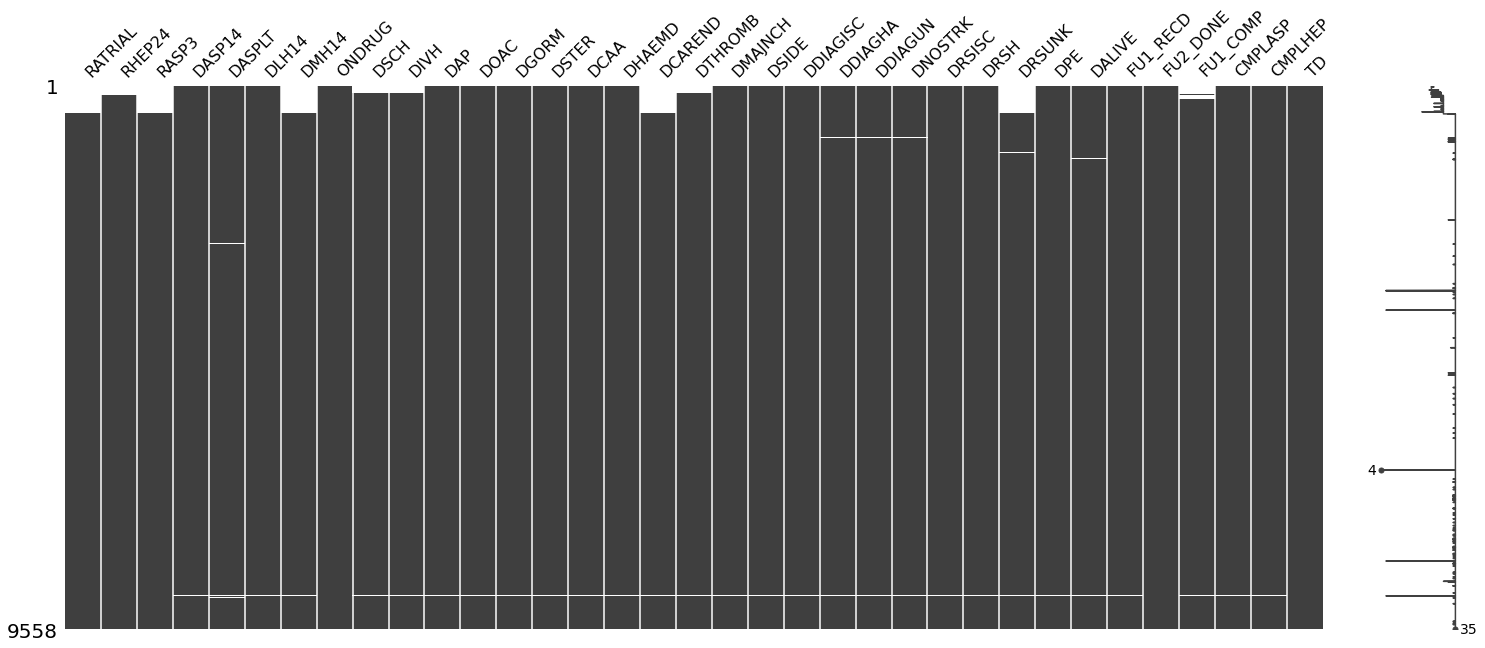

In [23]:
# see if values are Missing completely at random
missingdata_data = data.columns[data.isnull().any()].tolist()
msno.matrix(data[missingdata_data])

This matrix shows how nulls are scattered across the dataset. White segments or lines represent where missing values lie.

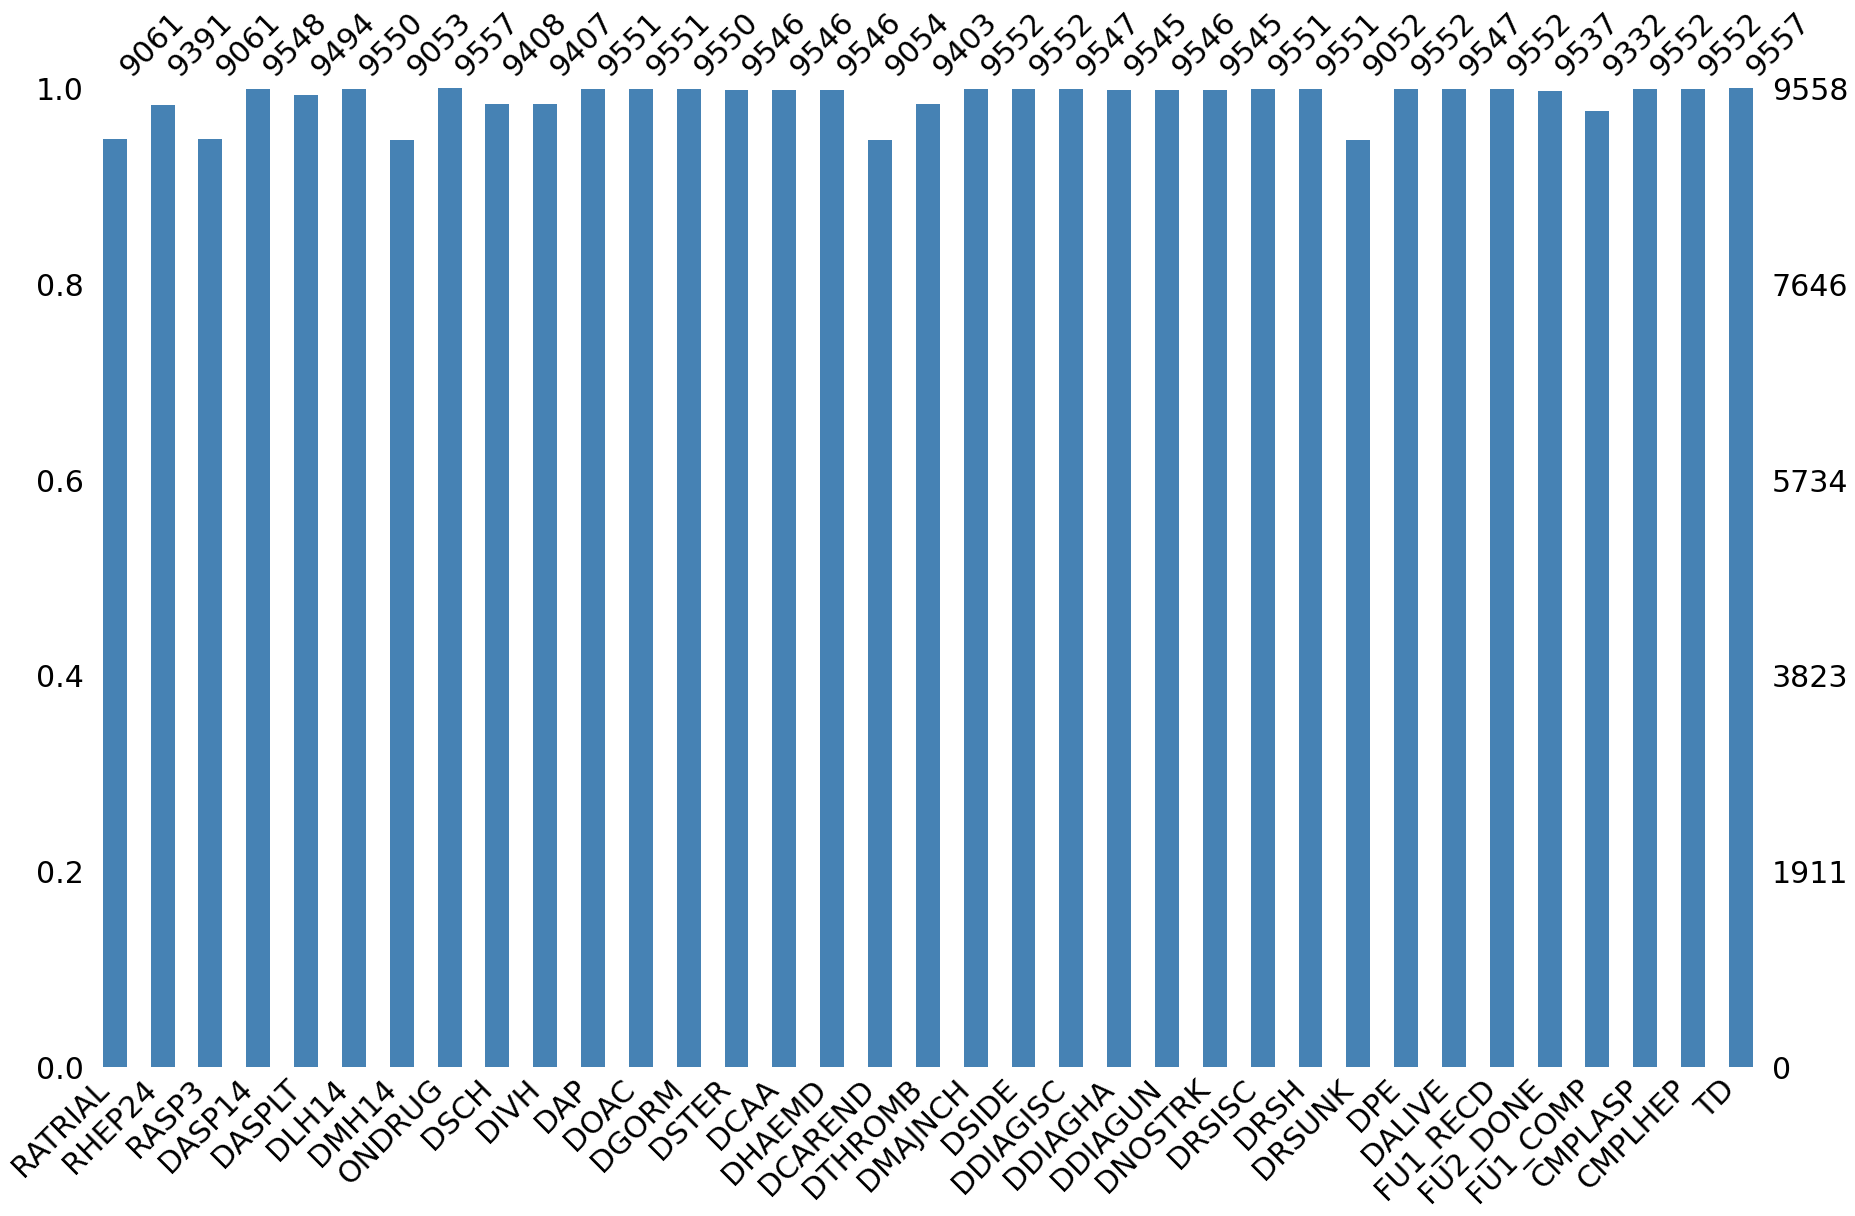

In [24]:
msno.bar(data[missingdata_data], color="steelblue", figsize=(30,18), fontsize=30)

In [25]:
num = [col for col in data.columns if data[col].dtype != 'object']
obj = [col for col in data.columns if data[col].dtype == 'object']

In [26]:
# Use fillna to impute null values with median in numeric columns 
data.fillna(data[num].median(), inplace = True)

In [27]:
# Use fillna to impute null values with mode in categorical columns 
l = data[obj].mode()
data[obj] = data[obj].fillna(value=l.iloc[0])

In [28]:
data.isna().sum()

ID           0
HOSPNUM      0
RDELAY       0
RCONSC       0
SEX          0
AGE          0
RSLEEP       0
RATRIAL      0
RCT          0
RVISINF      0
RHEP24       0
RASP3        0
RSBP         0
RDEF1        0
RDEF2        0
RDEF3        0
RDEF4        0
RDEF5        0
RDEF6        0
RDEF7        0
RDEF8        0
STYPE        0
RDATE        0
HOURLOCAL    0
MINLOCAL     0
DAYLOCAL     0
RXASP        0
RXHEP        0
DASP14       0
DASPLT       0
DLH14        0
DMH14        0
ONDRUG       0
DSCH         0
DIVH         0
DAP          0
DOAC         0
DGORM        0
DSTER        0
DCAA         0
DHAEMD       0
DCAREND      0
DTHROMB      0
DMAJNCH      0
DMAJNCHX     0
DSIDE        0
DSIDEX       0
DDIAGISC     0
DDIAGHA      0
DDIAGUN      0
DNOSTRK      0
DNOSTRKX     0
DRSISC       0
DRSH         0
DRSUNK       0
DPE          0
DALIVE       0
FU1_RECD     0
FU2_DONE     0
COUNTRY      0
CNTRYNUM     0
FU1_COMP     0
CMPLASP      0
CMPLHEP      0
TD           0
EXPDD        0
EXPD6     

In [29]:
# Plot correlation matrix for visual of multicollinearity
corrMatrix = data.corr()
corrMatrix.style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)

In [30]:
# check for VIF?

In [31]:
# All features 
data_num = list(data.select_dtypes(include = np.number).columns)
data_obj = list(data.select_dtypes(include = np.object).columns) 

In [32]:
data_num

['ID',
 'HOSPNUM',
 'RDELAY',
 'AGE',
 'RSBP',
 'RDATE',
 'HOURLOCAL',
 'MINLOCAL',
 'DAYLOCAL',
 'ONDRUG',
 'DMAJNCHX',
 'DSIDEX',
 'DNOSTRKX',
 'FU1_RECD',
 'FU2_DONE',
 'CNTRYNUM',
 'FU1_COMP',
 'TD',
 'EXPDD',
 'EXPD6',
 'EXPD14',
 'SET14D',
 'ID14',
 'DEAD1',
 'DEAD2',
 'DEAD3',
 'DEAD4',
 'DEAD5',
 'DEAD6',
 'DEAD7',
 'DEAD8',
 'H14',
 'ISC14',
 'NK14',
 'STRK14',
 'HTI14',
 'PE14',
 'DVT14',
 'TRAN14',
 'NCB14']

In [33]:
data_obj

['RCONSC',
 'SEX',
 'RSLEEP',
 'RATRIAL',
 'RCT',
 'RVISINF',
 'RHEP24',
 'RASP3',
 'RDEF1',
 'RDEF2',
 'RDEF3',
 'RDEF4',
 'RDEF5',
 'RDEF6',
 'RDEF7',
 'RDEF8',
 'STYPE',
 'RXASP',
 'RXHEP',
 'DASP14',
 'DASPLT',
 'DLH14',
 'DMH14',
 'DSCH',
 'DIVH',
 'DAP',
 'DOAC',
 'DGORM',
 'DSTER',
 'DCAA',
 'DHAEMD',
 'DCAREND',
 'DTHROMB',
 'DMAJNCH',
 'DSIDE',
 'DDIAGISC',
 'DDIAGHA',
 'DDIAGUN',
 'DNOSTRK',
 'DRSISC',
 'DRSH',
 'DRSUNK',
 'DPE',
 'DALIVE',
 'COUNTRY',
 'CMPLASP',
 'CMPLHEP']

In [34]:
dum = pd.get_dummies(data[data_obj], drop_first=True)

In [35]:
data_mod = pd.concat([data[data_num], dum], axis = 1)

In [36]:
data_mod.shape

(9558, 161)

In [37]:
data_mod.head()

,ID,HOSPNUM,RDELAY,AGE,RSBP,RDATE,HOURLOCAL,MINLOCAL,DAYLOCAL,ONDRUG,DMAJNCHX,DSIDEX,DNOSTRKX,FU1_RECD,FU2_DONE,CNTRYNUM,FU1_COMP,TD,EXPDD,EXPD6,EXPD14,SET14D,ID14,DEAD1,DEAD2,DEAD3,DEAD4,DEAD5,DEAD6,DEAD7,DEAD8,H14,ISC14,NK14,STRK14,HTI14,PE14,DVT14,TRAN14,NCB14,RCONSC_F,RCONSC_U,SEX_M,RSLEEP_Y,RATRIAL_Y,RCT_Y,RVISINF_Y,RHEP24_Y,RASP3_Y,RDEF1_N,RDEF1_Y,RDEF2_N,RDEF2_Y,RDEF3_N,RDEF3_Y,RDEF4_N,RDEF4_Y,RDEF5_N,RDEF5_Y,RDEF6_N,RDEF6_Y,RDEF7_N,RDEF7_Y,RDEF8_N,RDEF8_Y,STYPE_OTH,STYPE_PACS,STYPE_POCS,STYPE_TACS,RXASP_Y,RXHEP_L,RXHEP_M,RXHEP_N,DASP14_U,DASP14_Y,...,DAP_Y,DOAC_U,DOAC_Y,DGORM_U,DGORM_Y,DSTER_U,DSTER_Y,DCAA_U,DCAA_Y,DHAEMD_U,DHAEMD_Y,DCAREND_U,DCAREND_Y,DTHROMB_U,DTHROMB_Y,DMAJNCH_U,DMAJNCH_Y,DSIDE_U,DSIDE_Y,DDIAGISC_U,DDIAGISC_Y,DDIAGISC_u,DDIAGHA_U,DDIAGHA_Y,DDIAGUN_U,DDIAGUN_Y,DNOSTRK_U,DNOSTRK_Y,DRSISC_U,DRSISC_Y,DRSH_U,DRSH_Y,DRSUNK_U,DRSUNK_Y,DPE_U,DPE_Y,DALIVE_U,DALIVE_Y,COUNTRY_AUSL,COUNTRY_AUST,COUNTRY_BELG,COUNTRY_BRAS,COUNTRY_CANA,COUNTRY_CHIL,COUNTRY_CZEC,COUNTRY_DENM,COUNTRY_EIRE,COUNTRY_FINL,COUNTRY_FRAN,COUNTRY_GREE,COUNTRY_HONG,COUNTRY_HUNG,COUNTRY_INDI,COUNTRY_ISRA,COUNTRY_ITAL,COUNTRY_JAPA,COUNTRY_NETH,COUNTRY_NEW,COUNTRY_NORW,COUNTRY_POLA,COUNTRY_PORT,COUNTRY_ROMA,COUNTRY_SING,COUNTRY_SLOK,COUNTRY_SLOV,COUNTRY_SOUT,COUNTRY_SPAI,COUNTRY_SRI,COUNTRY_SWED,COUNTRY_SWIT,COUNTRY_TURK,COUNTRY_UK,COUNTRY_USA,CMPLASP_Y,CMPLHEP_Y
0,9826,1,43,71,170,1,99,99,3,11.0,0,0,0,11.0,189.0,27,16.0,189.0,0.5275,0.1009,0.0323,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
1,9827,1,6,81,170,1,99,99,7,14.0,0,0,0,23.0,183.0,27,16.0,183.0,0.4021,0.1147,0.0244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
2,9828,4,20,78,170,1,99,99,6,14.0,0,0,0,17.0,214.0,27,16.0,214.0,0.5600,0.1709,0.0441,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
3,9829,1,39,54,135,1,99,99,2,7.0,0,0,0,16.0,185.0,27,16.0,185.0,0.3132,0.0471,0.0244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
4,9830,1,4,77,140,1,99,99,1,14.0,0,1,0,15.0,194.0,27,15.0,194.0,0.7285,0.1873,0.0530,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1


In [38]:
x_test = data_mod

In [39]:
x_test.columns

Index(['ID', 'HOSPNUM', 'RDELAY', 'AGE', 'RSBP', 'RDATE', 'HOURLOCAL',
       'MINLOCAL', 'DAYLOCAL', 'ONDRUG',
       ...
       'COUNTRY_SOUT', 'COUNTRY_SPAI', 'COUNTRY_SRI', 'COUNTRY_SWED',
       'COUNTRY_SWIT', 'COUNTRY_TURK', 'COUNTRY_UK', 'COUNTRY_USA',
       'CMPLASP_Y', 'CMPLHEP_Y'],
      dtype='object', length=161)

In [40]:
# load the model from disk
xgb_m = pickle.load(open('xgb_m1b.sav', 'rb'))

In [42]:
cols_when_model_builds = xgb_m.get_booster().feature_names

In [43]:
x_test = x_test[cols_when_model_builds]
x_test.columns

Index(['TD', 'DEAD8', 'DEAD2', 'DEAD7', 'DEAD5', 'DEAD1', 'DEAD4', 'FU2_DONE',
       'RHEP24_Y', 'DDIAGUN_Y'],
      dtype='object')

In [44]:
y_test = xgb_m.predict(x_test)
y_test = pd.DataFrame(y_test, columns = ['PatientDied'])
y_test.replace({0: 'N', 1: 'Y'}, inplace = True)

In [45]:
ID = data_mod.loc[:,['ID']]
ID['ID'] = ID['ID'].astype('object')

ID.head()

,ID
0,9826
1,9827
2,9828
3,9829
4,9830


In [46]:
df = pd.concat([ID, y_test], axis = 1)
df = df[['ID','PatientDied']]
df.head(20)

,ID,PatientDied
0,9826,N
1,9827,N
2,9828,N
3,9829,N
4,9830,N
5,9831,N
6,9832,N
7,9833,N
8,9834,N
9,9835,N


In [47]:
df.to_csv("Result1b.csv", index = False)